<a href="https://colab.research.google.com/github/ibrahimelawady/data-portfolio/blob/main/project_03_employee_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Project 03: Employee Data Cleaning & Insights

#Overview
This project focuses on **cleaning and analyzing the HR Employee Attrition dataset**.  
The dataset contains demographic, job-related, and attrition information about employees.

### Goals
1. Clean the dataset (missing values, duplicates, inconsistent data).
2. Perform basic exploratory data analysis (EDA).
3. Extract insights about employee attrition patterns.
4. Prepare the dataset for future machine learning tasks.


In [ ]:
# =====================================================
# Project 03: Employee Data Cleaning & Insights
# =====================================================

# --- Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 2: Load Dataset from Google Drive
path = "/content/drive/MyDrive/DATA_SCIENCE_PROJECTS/WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(path)

# --- Step 3: Basic Information
print("Dataset Shape:", df.shape)
print("\n--- Columns ---\n", df.columns.tolist())
print("\n--- Info ---")
df.info()
print("\n--- First 5 Rows ---")
df.head()


Dataset Shape: (1470, 35)

--- Columns ---
 ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


##  Data Cleaning Plan
To ensure data quality, we will perform the following steps:

1. **Check for missing values** → Handle or remove them.
2. **Check for duplicate rows** → Drop if any.
3. **Standardize column names** → Ensure consistency.
4. **Check data types** → Convert if necessary.
5. **Categorical & Numerical separation** → For proper analysis later.


In [ ]:
# --- Step 4: Check for Missing Values
print("Missing Values per Column:")
print(df.isnull().sum())

# --- Step 5: Check for Duplicates
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)
if duplicates > 0:
    df = df.drop_duplicates()

# --- Step 6: Standardize Column Names (optional, if needed)
df.columns = df.columns.str.strip().str.replace(" ", "_")

# --- Step 7: Data Types
print("\n--- Data Types ---")
print(df.dtypes)


Missing Values per Column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurren

/tmp/ipython-input-3846562909.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Attrition", data=df, palette="Set2")


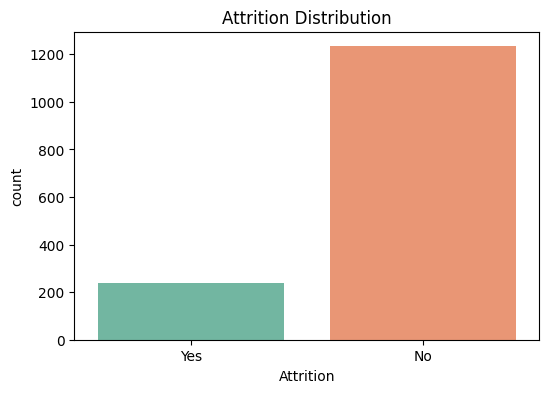

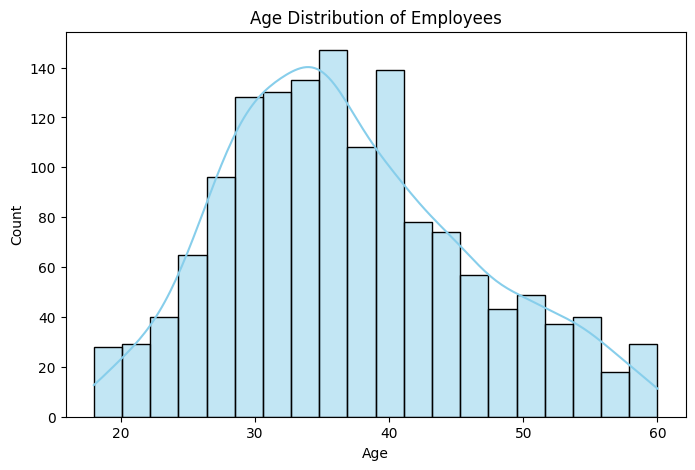

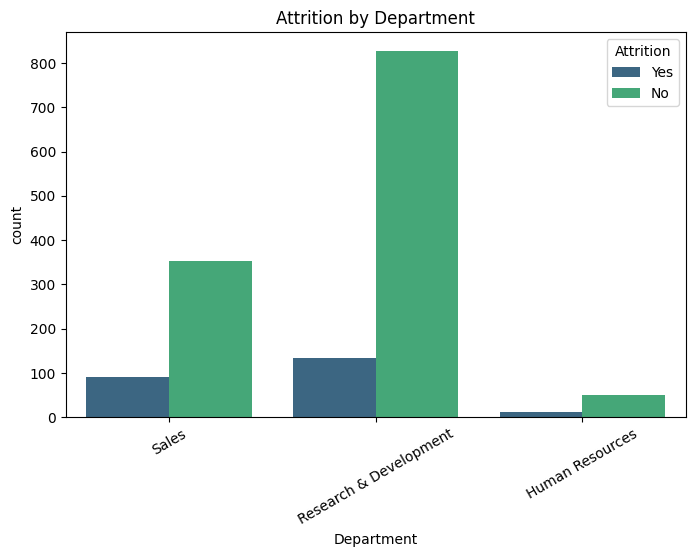

In [ ]:
# --- Attrition Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Attrition", data=df, palette="Set2")
plt.title("Attrition Distribution")
plt.show()

# --- Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution of Employees")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# --- Department vs Attrition
plt.figure(figsize=(8,5))
sns.countplot(x="Department", hue="Attrition", data=df, palette="viridis")
plt.title("Attrition by Department")
plt.xticks(rotation=30)
plt.show()


##  Insights

1. **Attrition Distribution**  
   The dataset is imbalanced with more "No" attrition cases than "Yes".

2. **Age Distribution**  
   Most employees are between 30-40 years old, with fewer very young or older employees.

3. **Department vs Attrition**  
   The Sales department shows a relatively higher attrition rate compared to other departments.

---


